In [5]:
from numpy.fft import fft, fftshift
import numpy as np
import matplotlib.pyplot as plt

In [4]:
window = np.hanning(51)

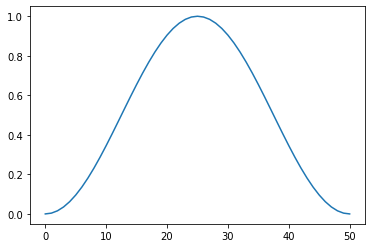

In [6]:
plt.plot(window)

/Users/yg/anaconda3/envs/mathds/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


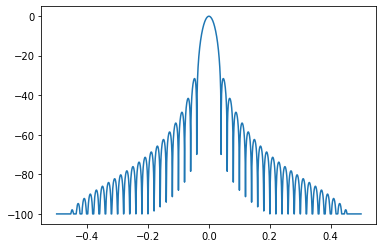

In [12]:
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)

In [128]:
path = "code/images"

In [105]:
def sinc(x,w, N):
    y1 = 2 * np.pi * x * (w + 0.5)
    y1 /= N
    y2 = np.pi * x
    y2 /= N
    out = np.where(x  == 0, 2 * w + 1, np.sin(y1)/np.sin(y2))
    return out

In [106]:
def hann(x, w, N):
    shift =-N//(2 * w)
    return 0.5 *  sinc(x, w, N)+ 0.25 * sinc(x-shift, w, N) + 0.25 * sinc(x+shift, w, N)

N=100, w=10, shift=-5


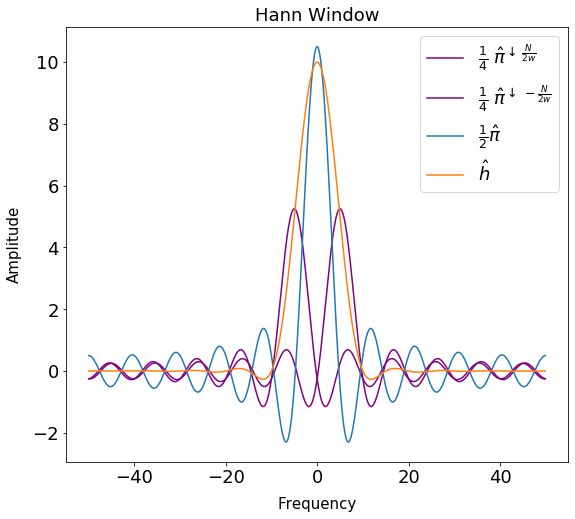

In [148]:
plt.figure(figsize=(9, 8))
#plt.figure(figsize=(9, 6))
N = 100
x =  np.arange(-N//2, N//2, 0.1)
w =  10
shift = -N//(2 * w)
print(f"N={N}, w={w}, shift={shift}")
component1 = 0.25 * sinc(x+shift, w, N)
component2 = 0.25 * sinc(x-shift, w, N)
component3 = 0.5 *  sinc(x, w, N)
hann = component1 + component2 + component3
plt.plot(x, component1, "purple", label=r"$\frac{1}{4} \; \hat{\pi}^{\downarrow \, \frac{N}{2w}}$")
plt.plot(x, component2, "purple", label=r"$\frac{1}{4} \; \hat{\pi}^{\downarrow \, -\frac{N}{2w}}$")
plt.plot(x, component3, label=r"$\frac{1}{2}\hat{\pi}$")
plt.plot(x, hann, label=r"$\hat{h}$")
plt.title("Hann Window", fontsize=18)
plt.ylabel("Amplitude", fontsize=15, labelpad=10)
plt.xlabel("Frequency", fontsize=15, labelpad=10)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(path + '/Hann.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [102]:
# plt.plot(x, color='red', label="Original signal, {} samples".format(signal_lenght))
# plt.plot(y, color='blue', label="Filtered low-pass with cutoff frequency of {} Hz".format(cutoff_frequency))
# plt.plot(diff, color='gray', label="What has been removed")
# plt.title("Signal and its filtering")
# plt.xlabel('Time (1/50th sec. per tick)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()

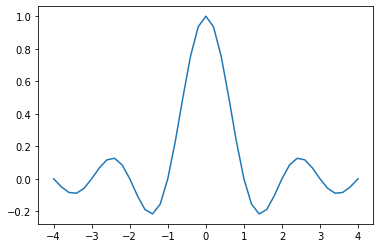

In [111]:
x = np.linspace(-4, 4, 41)
plt.plot(x, np.sinc(x))